In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


here i can see name, sex, ticket, cabin and embarked are in object or string datatype, we havw to encode these columns.

i can see some NaN values too, i need to replace those values.

there are 891 rows and 12 columns.

according to the data we have to find whether the guests survived or not, for that name, passenger id and ticket cannot be responsible so will be dropping those columns.

In [2]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

all the columns of the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


age, cabin, embarked has null values.
there are 2 float datatype columns, 5 integer datatype column and 5 object datatype column.

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

age has 177 null values, cabin has 687 and embarked has 2 null values

In [5]:
(687/891)*100

77.10437710437711

cabin column has 77.1% data missing. we need to drop the column as the missing data is more than 75%.

In [6]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)


dropping passengerid column as it has nothing to do with the survival of the person.
dropped cabin column.
Name has nothing to do with survival, dropping the column.
ticket has nothing to do with survival, dropping the column.

In [7]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

above is the individual counts of each category in the categorical columns.

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


in fare column mean is higher than median, the data is skewed, 75% and max value has a huge diffrence outliers might be present.

same goes for the age column

<AxesSubplot:>

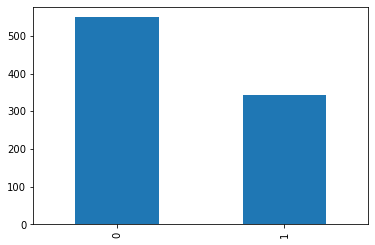

In [13]:
df.Survived.value_counts().plot(kind='bar')

0 counts are more than 500

1 counts are between 300-400

<AxesSubplot:>

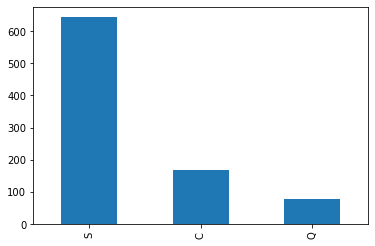

In [14]:
df.Embarked.value_counts().plot(kind='bar')

s counts are more than 600

c counts is near to 200

q counts is less than 100

<AxesSubplot:>

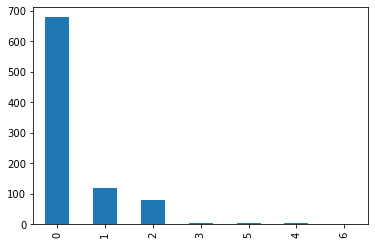

In [15]:
df.Parch.value_counts().plot(kind='bar')

more than 600 people do not have any parents or children onboard.

<AxesSubplot:>

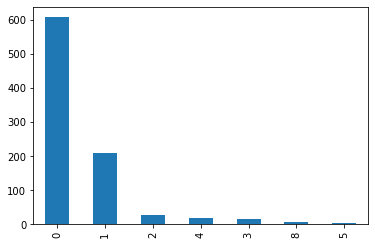

In [16]:
df.SibSp.value_counts().plot(kind='bar')

almost 600 peopke do not have any sibling or spouse.

<AxesSubplot:>

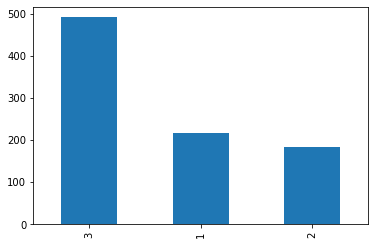

In [17]:
df.Pclass.value_counts().plot(kind='bar')

in class 3 almost 500 people are staying

in class 1 almost 200 people are staying

in class 2 less than 200 people are staying

<AxesSubplot:>

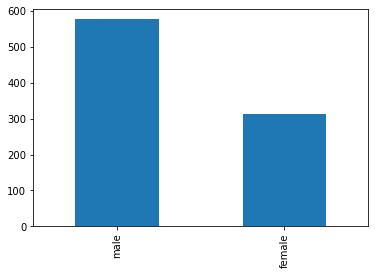

In [18]:
df.Sex.value_counts().plot(kind='bar')

male count is more than female

<AxesSubplot:>

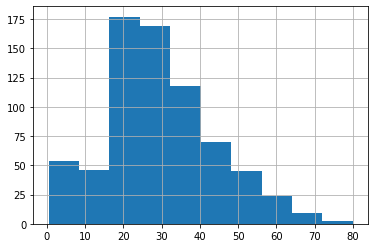

In [19]:
df.Age.hist()

more people range between the age of 18-32

<AxesSubplot:>

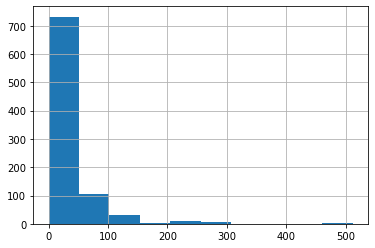

In [20]:
df.Fare.hist()

fare mostly ranges between 0-50

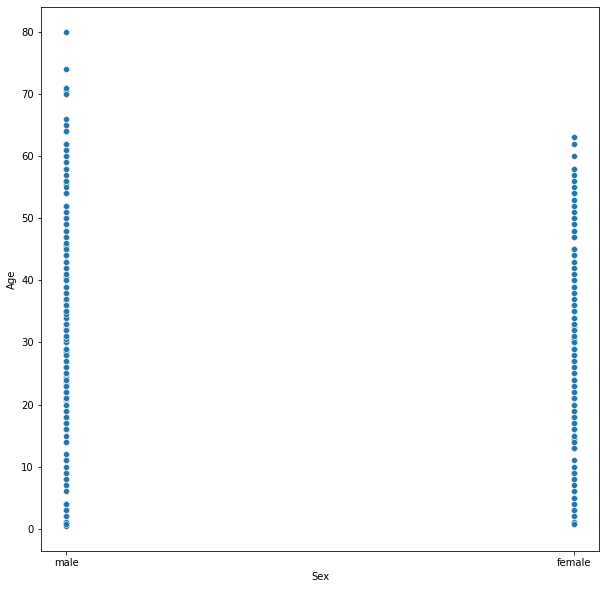

In [21]:
plt.figure(figsize=[10,10])
sn.scatterplot(df['Sex'],df['Age']);

male has compatitively higher age

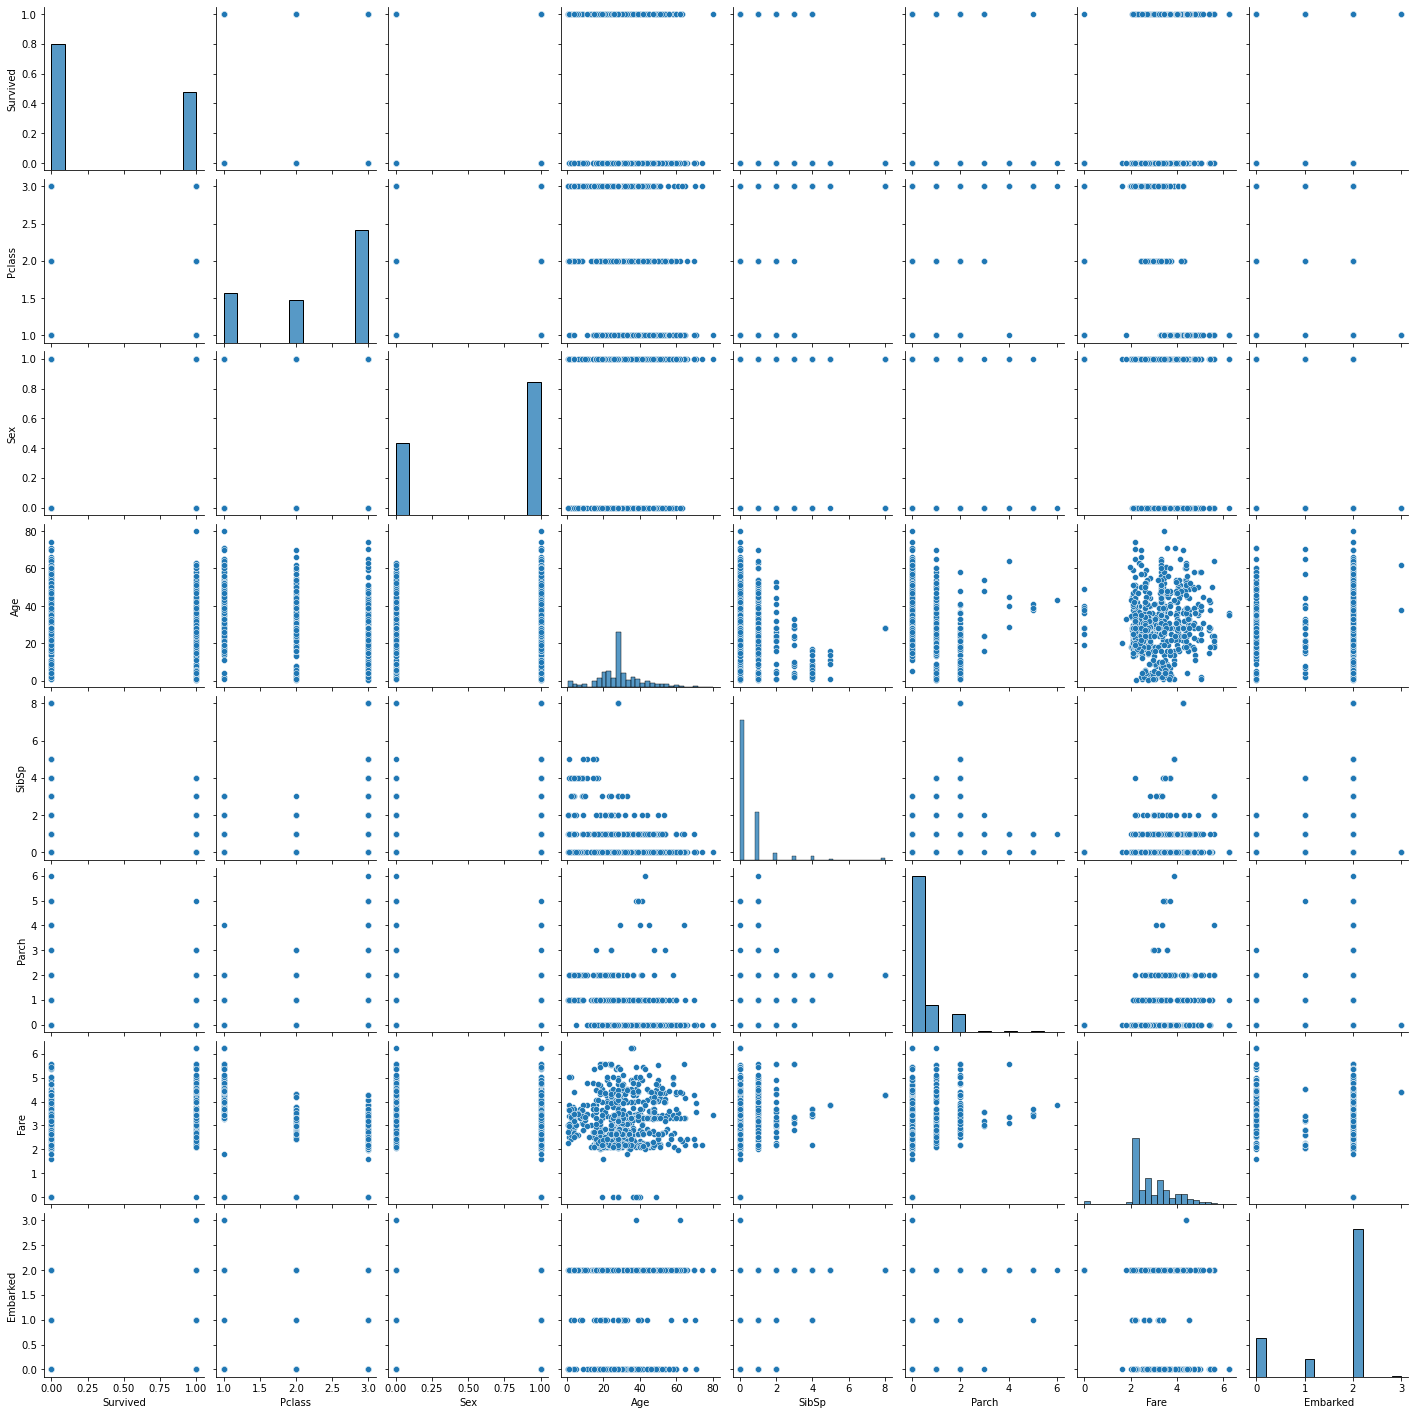

In [83]:
sn.pairplot(df)

if we see the survive column less age people had higher chance of surviving, people who were alone survived more, people staying in class 1 has survived more.

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
df['Sex'] = LB.fit_transform(df['Sex'])
df['Embarked'] = LB.fit_transform(df['Embarked'])

encoding the categorical columns which has the string datatype

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [25]:
cor=df.corr()

<AxesSubplot:>

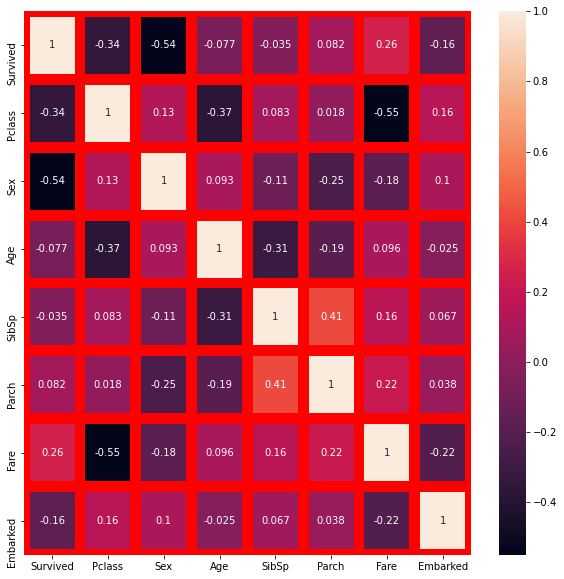

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sn.heatmap(cor,annot=True,linewidth=10,linecolor='r')

sex column has negative correlation with the target column.

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

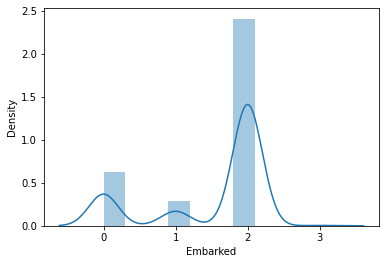

In [27]:
sn.distplot(df['Embarked'],bins=10)

the column is skewed

<AxesSubplot:xlabel='Age', ylabel='Density'>

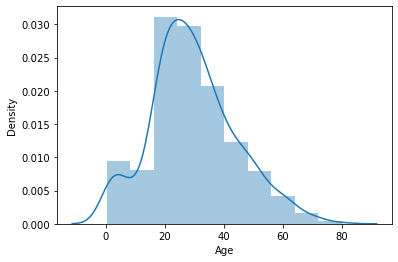

In [28]:
sn.distplot(df['Age'],bins=10)

plot is slightly skewed

Survived       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Pclass      AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Sex          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Age         AxesSubplot(0.606034,0.536818;0.133621x0.343182)
SibSp       AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Parch             AxesSubplot(0.125,0.125;0.133621x0.343182)
Fare           AxesSubplot(0.285345,0.125;0.133621x0.343182)
Embarked        AxesSubplot(0.44569,0.125;0.133621x0.343182)
dtype: object

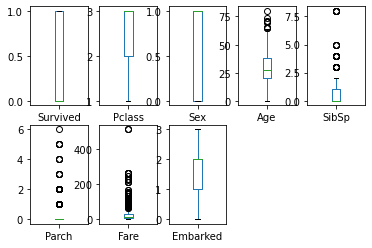

In [29]:
df.plot(kind='box',subplots=True,layout=(2,5))

outliers are present in age and fare column. sibsp and parch are categorical columns we will ignore the outliers

In [30]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].median())
df['Age']=df['Age'].fillna(df['Age'].median())


filled the null values in embarked and age column

In [31]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

no null values are present now

In [32]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
a=df[(z<3).all(axis=1)]

In [33]:
a.shape

(820, 8)

In [34]:
df.shape

(891, 8)

In [35]:
Data_loss=((891-820)/891)*100
Data_loss

7.968574635241302

after removing the outliers with zscore method as the data loss is more than 5% we wont remove the outliers

In [36]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_new=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [37]:
df.shape

(891, 8)

In [38]:
df_new.shape

(577, 8)

In [39]:
Data_loss=((891-577)/891)*100
Data_loss

35.24130190796858

after removing the outliers with IQR method as the data loss is more than 5% we wont remove the outliers

In [40]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
def calc_vif(a):
    vif=pd.DataFrame()
    vif["variables"]=df.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

In [42]:
calc_vif(df)

,variables,VIF FACTOR
0,Survived,1.954239
1,Pclass,6.063917
2,Sex,3.697539
3,Age,4.840010
4,SibSp,1.582742
5,Parch,1.614518
6,Fare,1.888714
7,Embarked,4.695459


all the columns have good multicollinearity, will not drop any column

In [43]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.246689
dtype: float64

In [44]:
df['Fare']=np.log1p(df['Fare'])
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        0.394928
Embarked   -1.246689
dtype: float64

removed skewness from the fare column, all column are almost in the range of +/-0.5

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,2.639057,2
887,1,1,0,19.0,0,0,3.433987,2
888,0,3,0,28.0,1,2,3.196630,2
889,1,1,1,26.0,0,0,3.433987,0


In [46]:
y=df.iloc[:,0]
x=df.iloc[:,1:8]

splitting data for training and testing

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [48]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6
0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.879741,0.581114
1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,1.361220,-1.938460
2,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.798540,0.581114
3,-1.566107,-1.355574,0.433312,0.432793,-0.473674,1.062038,0.581114
4,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.784179,0.581114
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.333698,0.581114
887,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,0.487082,0.581114
888,0.827377,-1.355574,-0.104637,0.432793,2.008933,0.242007,0.581114
889,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,0.487082,-1.938460


scaled the feature columns in one scale

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


In [50]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)
    

best accuracy is 0.8508474576271187 on random state 183


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=183)

In [69]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),LogisticRegression(),RandomForestClassifier()]
for a in model:
    a.fit(x_train,y_train)
    a.score(x_train,y_train)
    predm=a.predict(x_test)
    print('accuracy score of' ,a, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of DecisionTreeClassifier() is:
0.847457627118644
[[167  24]
 [ 21  83]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       191
           1       0.78      0.80      0.79       104

    accuracy                           0.85       295
   macro avg       0.83      0.84      0.83       295
weighted avg       0.85      0.85      0.85       295



accuracy score of SVC() is:
0.8
[[165  26]
 [ 33  71]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       191
           1       0.73      0.68      0.71       104

    accuracy                           0.80       295
   macro avg       0.78      0.77      0.78       295
weighted avg       0.80      0.80      0.80       295



accuracy score of KNeighborsClassifier() is:
0.7932203389830509
[[162  29]
 [ 32  72]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       191
   

In [70]:
from sklearn.model_selection import cross_val_score
for a in model:
    c=cross_val_score(a,x,y,cv=5).mean()
    print("the cross val score of",a,"is: ",c)

the cross val score of DecisionTreeClassifier() is:  0.7800326407632918
the cross val score of SVC() is:  0.8237838177138912
the cross val score of KNeighborsClassifier() is:  0.8114556525014123
the cross val score of LogisticRegression() is:  0.7856317870817902
the cross val score of RandomForestClassifier() is:  0.8081036971941498


after seeing the accuracy score of the models and cross val scores of the models the least difference is in logistic regression hence it is our best model.

In [54]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [71]:
parameter={'random_state':np.arange(0,10),
        'fit_intercept':['True','False'],
          'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
          'C':np.arange(0,10)}

In [72]:
GCV=GridSearchCV(LogisticRegression(),parameter,cv=5)

In [73]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'fit_intercept': ['True', 'False'],
                         'random_state': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [74]:
GCV.best_params_

{'C': 1, 'fit_intercept': 'True', 'random_state': 0, 'solver': 'liblinear'}

In [75]:
titanic_mod=LogisticRegression(C=1,fit_intercept=True,random_state=0,solver='liblinear')
titanic_mod.fit(x_train,y_train)
pred=titanic_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

77.96610169491525


after hyper parameter tuning the accuracy score os 77.96 which is almost 78%.

In [76]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [77]:
y_pred_prob=titanic_mod.predict_proba(x_test)[:,1]

In [78]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

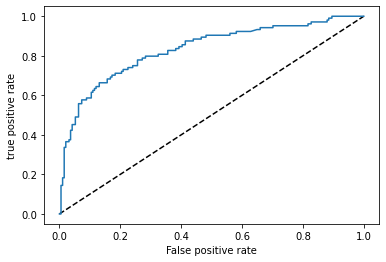

In [79]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.show()


In [80]:
auc_score=roc_auc_score(y_test,titanic_mod.predict(x_test))


In [81]:
print(auc_score)

0.7597664115988724


auc score is almost similar to our model accuracy.

In [82]:
import joblib
joblib.dump(titanic_mod,"titanicsurvivemodel.pkl")

['titanicsurvivemodel.pkl']